# Compilation of paleointensity results from the Midcontinent Rift

This Jupyter notebook contains data analysis and generates figures for a manuscript in Geophysical Journal International entitled:

**A field like today's? The strength of the geomagnetic field 1.1 billion years ago**

Courtney J. Sprain, Nicholas L. Swanson-Hysell, Luke M. Fairchild and Kevin Gaastra.

## Import necessary modules

In [1]:
import pmagpy.pmag as pmag
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
from scipy import stats
matplotlib.rcParams['svg.fonttype'] = 'none'
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

## Import data 

First we import data from relatively recent geological history. This ‘Recent’ data set is the same used in Biggin et al. (2015) and consists of measurements of VDM from the PINT database at the site-mean level that are derived from rocks with a stated age between 1 Myr and 300 Myr. Data further was filtered to only include results that met the STAT criterion and results from experiments that used the following techniques: T+ (Thellier with pTRM checks), M+ (Microwave with pTRM checks), LTD-DHT Shaw or some combination including at least one of these. To focus on the long-term average, we will look at values between 1 to 300 Ma (avoiding the high sampling of units 1 Ma or younger).

In [2]:
pd.set_option("display.max_rows",101)
Recent_PINT = pd.read_excel('../data/PINT_0_300Ma.xlsx')
recent_PINT = Recent_PINT.loc[Recent_PINT.AGE > 0.99]
recent_values = recent_PINT['VDM/VADM']/10

Paleointensity estimates generated from the Midcontinent Rift and Abitibi dikes were downloaded from the IAGA Paleointensity database and our new data were added to these data in the same format. In the code below, the IAGA Paleointensity data plus our new data are imported and then data from the Midcontinent Rift are split up by study.

In [3]:
MCR_PINT_database = pd.read_csv('../data/MCR_PINT_data.csv', 
                                skiprows=2)

To separate Midcontinent Rift data, we organized it into groups based on study. The 'Ref' column refers to the studies that the data was taken from. Within this column, 
* '199' refers to data from the Abitibi dikes presented in Macouin et al. (2003)
* '54' refers to various Midcontinent rift units presented in Pesonen and Halls (1983)
* '687' refers to data from the Lake Shore Traps reported in Kulakov et al. (2013)
* 'this study' refers to new data presented here 

A new dataframe is made for data from each of these studies.

In [4]:
MCR_PINT_Abitibi = MCR_PINT_database.loc[MCR_PINT_database.Ref == '199']
MCR_PINT_PH = MCR_PINT_database.loc[MCR_PINT_database.Ref == '54']
MCR_PINT_LST = MCR_PINT_database.loc[MCR_PINT_database.Ref == '687']
MCR_PINT_new = MCR_PINT_database.loc[MCR_PINT_database.Ref == 'this study']
MCR_PINT_new

,Data,IDENT,SLAT,SLONG,AGE,DAGE,AgeMtd,P,Country,Continent,...,DFPc,VDM,GROUP,TYPE,FORM,ROCKMAG,COMMENTS,LOCATION NAME,Ref,Changes from IAGA
59,NaN,MP303(142.2-152.9),47.0519,275.2273,1096.0,3,correlation,N,Canada,North America,...,11,2.4,Volcanic,basalt,Lava flow,NaN,NaN,Mamainse Point,this study,NaN
60,NaN,MP212(22.2-30.8),47.0468,275.2243,1095.5,3,correlation,N,Canada,North America,...,22,3.8,Volcanic,basalt,Lava flow,NaN,NaN,Mamainse Point,this study,NaN
61,NaN,SI1(58.1-64.1),48.8086,-87.6622,1107.9,2,U-Pb/correlation,R,Canada,North America,...,0,7.3,Volcanic,basalt,Lava flow,NaN,NaN,Osler Volcanic Group,this study,NaN
62,NaN,SI8(106.6-115.4),48.7449,-87.6276,1105.9,2,U-Pb/correlation,R,Canada,North America,...,3,7.3,Volcanic,basalt,Lava flow,NaN,NaN,Osler Volcanic Group,this study,NaN
63,NaN,SI6(12.0-28.4),48.7460,-87.6394,1105.6,2,U-Pb/correlation,R,Canada,North America,...,12,7.0,Volcanic,basalt,Lava flow,NaN,NaN,Osler Volcanic Group,this study,NaN


We next separated the data from Pesonen and Halls (1983) based on geologic material which is indicated in the 'FORM' column. 

In [5]:
MCR_PINT_PH_intrusive = MCR_PINT_PH.loc[MCR_PINT_PH.FORM == 'Dyke ']
MCR_PINT_PH_flows = MCR_PINT_PH.loc[MCR_PINT_PH.FORM == 'Lava Flow ']
MCR_PINT_PH_baked = MCR_PINT_PH.loc[MCR_PINT_PH.FORM == 'Baked contact ']
MCR_PINT_PH_mixed = MCR_PINT_PH.loc[MCR_PINT_PH.FORM == 'Mixed']

Calculate the mean and standard deviation of paleointensity results from each study. Units are reported as $\text{ZAm}^2$.

In [6]:
print ("Mean of Pesonen and Halls")
print (np.mean(MCR_PINT_PH.VDM.tolist())*10)
print (np.std(MCR_PINT_PH.VDM.tolist())*10)
print ("\nMean of new data")
print (np.mean(MCR_PINT_new.VDM.tolist())*10)
print (np.std(MCR_PINT_new.VDM.tolist())*10)
print ("\nMean of Abitibi")
print (np.mean(MCR_PINT_Abitibi.VDM.tolist())*10)
print (np.std(MCR_PINT_Abitibi.VDM.tolist())*10)
print ("\nMean of Lake Shore Traps")
print (np.mean(MCR_PINT_LST.VDM.tolist())*10)
print (np.std(MCR_PINT_LST.VDM.tolist())*10)
print ("\nMean of new data + Lake Shore Traps")
print (np.mean(MCR_PINT_new.VDM.tolist() + MCR_PINT_LST.VDM.tolist())*10)
print (np.std(MCR_PINT_new.VDM.tolist() + MCR_PINT_LST.VDM.tolist())*10)
print ("\nMean of recent")
print (np.mean(recent_values.tolist())*10)
print (np.std(recent_values.tolist())*10)

Mean of Pesonen and Halls
95.7714285714
30.0272438654

Mean of new data
55.6
20.5970871727

Mean of Abitibi
13.0
3.6253078687

Mean of Lake Shore Traps
55.5666666667
9.93875690863

Mean of new data + Lake Shore Traps
55.5714285714
12.0529444281

Mean of recent
59.7303174466
34.3900649948


## Welch's T-tests

Conduct Welch's T-tests (assumes normal populations that have unequal variances) to test whether our new results share a common mean with past results from the Midcontinent Rift. If there is a large two-tailed p-value (i.e. large than 0.05 or 0.1), then the null hypothesis of identical averages cannot be rejected. 

In [7]:
stats.ttest_ind(MCR_PINT_PH.VDM.tolist(),
                MCR_PINT_new.VDM.tolist(),
                equal_var=False)

Ttest_indResult(statistic=3.2675709492413358, pvalue=0.011718386489727839)

In [8]:
stats.ttest_ind(MCR_PINT_LST.VDM.tolist(),
                MCR_PINT_new.VDM.tolist(),
                equal_var=False)

Ttest_indResult(statistic=-0.0031859487581657872, pvalue=0.99760163995563)

In [9]:
stats.ttest_ind(MCR_PINT_Abitibi.VDM.tolist(),
                MCR_PINT_new.VDM.tolist(),
                equal_var=False)

Ttest_indResult(statistic=-4.0944416972599331, pvalue=0.01373455542933557)

In [10]:
MCR_values_compiled = MCR_PINT_new.VDM.tolist() + MCR_PINT_LST.VDM.tolist()
stats.ttest_ind(recent_values.tolist(),
                MCR_values_compiled,
                equal_var=False)

Ttest_indResult(statistic=1.3337672282790369, pvalue=0.18444145296007419)

## Plotted vs. time
### Expected range associated with latitudinal motion

The intensity of the geomagnetic field varies as a function of latitude with the field being two times stronger at the pole than the equator. Given that Laurentia moved from high to low latitudes during the development of the Midcontinent Rift, a constant axial dipole moment over this period would result in a decrease in local intensity through the history of rift volcanism.

Our new paleointensity estimates from the Osler Volcanic Group give a paleointensity estimate of ~45 μT. We can use the function **pmag.b_vdm** to calculate the VDM implied by this local field intensity for a paleolatitude of 45º.

In [11]:
vadm = pmag.b_vdm(45e-6,45) 
print (vadm)

7.35978834058e+22


Our best current estimates are that the rate of latitudinal motion from higher to lower latitudes occured at a relatively constant rate of 17 cm/year. Using this rate, we can calculate predicted local field strength for a constant virtual axial dipole moment of $7.4 \times 10^{22} \text{A m}^2$.

In [12]:
time = np.arange(1080,1111,.1)

deg_Myr = ((17.0/100000)/111.0)*1000000
vadm = pmag.b_vdm(45e-6,45) 
paleolat = []
expected_intensity = []

for t in time:
    time_delta = 1105 - t
    paleolat.append(44 - (time_delta*deg_Myr))

for lat in paleolat:
    expected_intensity.append(pmag.vdm_b(vadm,lat)*10**6)

intensity_1111Ma = expected_intensity[-1]    

old_time = []
for dates in np.arange (1111,1143):
    old_time.append(dates)
    expected_intensity.append(intensity_1111Ma)
    
time = np.append(time,old_time) 

This predicted change resulting from latitudinal motion can be plotted along with published and new paleointensity estimates.

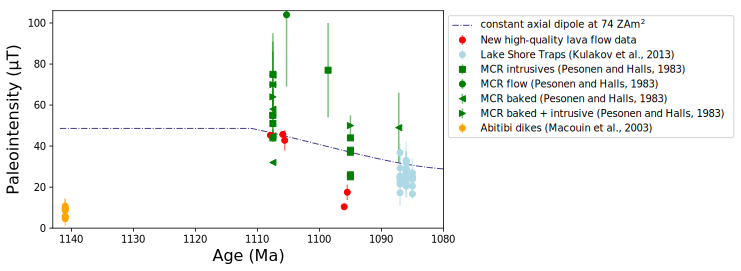

In [13]:
plt.figure(figsize=(7,4))
plt.errorbar(MCR_PINT_new['AGE'].tolist(),MCR_PINT_new['F'].tolist(), 
             yerr=MCR_PINT_new['DF'].tolist(),color='red',fmt ='o', 
             label = 'New high-quality lava flow data',alpha=0.5)
plt.errorbar(MCR_PINT_LST['AGE'].tolist(),MCR_PINT_LST['F'].tolist(), 
             yerr=MCR_PINT_LST['DF'].tolist(), color='lightblue', fmt ='o', 
             label = 'Lake Shore Traps (Kulakov et al., 2013)',alpha=0.5)
plt.errorbar(MCR_PINT_PH_intrusive['AGE'].tolist(),
             MCR_PINT_PH_intrusive['F'].tolist(), 
             yerr=MCR_PINT_PH_intrusive['DF'].tolist(),
             color='green',fmt ='s', 
             label = 'MCR intrusives (Pesonen and Halls, 1983)',alpha=0.5)
plt.errorbar(MCR_PINT_PH_flows['AGE'].tolist(),
             MCR_PINT_PH_flows['F'].tolist(), 
             yerr=MCR_PINT_PH_flows['DF'].tolist(),
             color='green',fmt ='o', 
             label = 'MCR flow (Pesonen and Halls, 1983)',alpha=0.5)
plt.errorbar(MCR_PINT_PH_baked['AGE'].tolist(),
             MCR_PINT_PH_baked['F'].tolist(), 
             yerr=MCR_PINT_PH_baked['DF'].tolist(),
             color='green',fmt ='<', 
             label = 'MCR baked (Pesonen and Halls, 1983)',alpha=0.5)
plt.errorbar(MCR_PINT_PH_mixed['AGE'].tolist(),
             MCR_PINT_PH_mixed['F'].tolist(), 
             yerr=MCR_PINT_PH_mixed['DF'].tolist(),
             color='green',fmt ='>', 
             label = 'MCR baked + intrusive (Pesonen and Halls, 1983)',
             alpha=0.5)
plt.errorbar(MCR_PINT_Abitibi['AGE'].tolist(),MCR_PINT_Abitibi['F'].tolist(), 
             yerr=MCR_PINT_Abitibi['DF'].tolist(), color='orange',fmt ='o', 
             label = 'Abitibi dikes (Macouin et al., 2003)',alpha=0.5)
plt.plot(time,expected_intensity, label='constant axial dipole at 74 $ZAm^2$', 
         c='darkslateblue', linestyle='dashdot', linewidth=1)
plt.xlim(1080,1143)
plt.ylim(0,106)
plt.ylabel(r'Paleointensity ($\mu$T)', fontsize = 16)
plt.xlabel('Age (Ma)', fontsize = 16)
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1))
plt.gca().invert_xaxis()
plt.savefig('../figures/MCR_Paleointensity_Age.pdf')
plt.show()

Below, the results are plotted without the Pesonen and Halls (1983) estimates.

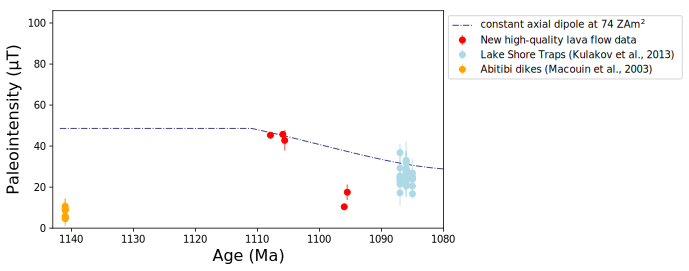

In [14]:
plt.figure(figsize=(7,4))
plt.errorbar(MCR_PINT_new['AGE'].tolist(),MCR_PINT_new['F'].tolist(), 
             yerr=MCR_PINT_new['DF'].tolist(), color='red',fmt ='o', 
             label = 'New high-quality lava flow data',alpha=0.5)
plt.errorbar(MCR_PINT_LST['AGE'].tolist(),MCR_PINT_LST['F'].tolist(), 
             yerr=MCR_PINT_LST['DF'].tolist(), color='lightblue',
             fmt ='o', label = 'Lake Shore Traps (Kulakov et al., 2013)',
             alpha=0.5)
plt.errorbar(MCR_PINT_Abitibi['AGE'].tolist(),
             MCR_PINT_Abitibi['F'].tolist(), 
             yerr=MCR_PINT_Abitibi['DF'].tolist(),
             color='orange',fmt ='o', 
             label = 'Abitibi dikes (Macouin et al., 2003)',
             alpha=0.5)
plt.plot(time,expected_intensity, 
         label='constant axial dipole at 74 $ZAm^2$', 
         c='darkslateblue', linestyle='dashdot', linewidth=1)
plt.xlim(1080,1143)
plt.ylim(0,106)
plt.ylabel(r'Paleointensity ($\mu$T)', fontsize = 16)
plt.xlabel('Age (Ma)', fontsize = 16)
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1))
plt.gca().invert_xaxis()
plt.show()

VDM estimates from the Midcontinent Rift are plotted with the median values calculated for the 'Mid (1400-2400 Ma)', 'Late (1300-500 Ma)', and 'Recent (300-1 Ma)' bins in Biggin et al. (2015).

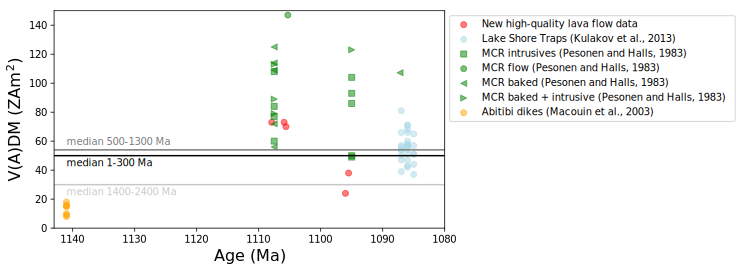

In [15]:
plt.figure(figsize=(7,4))
plt.scatter(MCR_PINT_new['AGE'],MCR_PINT_new['VDM']*10, 
             color='red',marker ='o', 
            label = 'New high-quality lava flow data',alpha=0.5)
plt.scatter(MCR_PINT_LST['AGE'],MCR_PINT_LST['VDM']*10, 
             color='lightblue',marker ='o',
            label = 'Lake Shore Traps (Kulakov et al., 2013)',alpha=0.5)
plt.scatter(MCR_PINT_PH_intrusive['AGE'],MCR_PINT_PH_intrusive['VDM']*10, 
             color='green',marker ='s', 
            label = 'MCR intrusives (Pesonen and Halls, 1983)',alpha=0.5)
plt.scatter(MCR_PINT_PH_flows['AGE'],MCR_PINT_PH_flows['VDM']*10, 
             color='green',marker ='o', 
            label = 'MCR flow (Pesonen and Halls, 1983)',alpha=0.5)
plt.scatter(MCR_PINT_PH_baked['AGE'],MCR_PINT_PH_baked['VDM']*10, 
             color='green',marker ='<', 
            label = 'MCR baked (Pesonen and Halls, 1983)',alpha=0.5)
plt.scatter(MCR_PINT_PH_mixed['AGE'],MCR_PINT_PH_mixed['VDM']*10, 
             color='green',marker ='>', 
            label = 'MCR baked + intrusive (Pesonen and Halls, 1983)',alpha=0.5)
plt.scatter(MCR_PINT_Abitibi['AGE'],MCR_PINT_Abitibi['VDM']*10, 
             color='orange',marker ='o', 
            label = 'Abitibi dikes (Macouin et al., 2003)',alpha=0.5)
plt.xlim(1080,1143)
plt.ylim(0,150)

plt.axhline(y=50,color='#000000')
plt.text(1141,48,'median 1-300 Ma',color='#000000',
         verticalalignment='top')
plt.axhline(y=54,color='#787878')
plt.text(1141,56,'median 500-1300 Ma',color='#787878',
         verticalalignment='bottom')
plt.axhline(y=30,color='#C8C8C8')
plt.text(1141,28,'median 1400-2400 Ma',color='#C8C8C8',
         verticalalignment='top')

plt.ylabel(r'V(A)DM $(ZAm^2)$', fontsize = 16)
plt.xlabel('Age (Ma)', fontsize = 16)
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1))
plt.gca().invert_xaxis()
plt.savefig('../figures/MCR_VADM.pdf')
plt.show()

### Median/mean of Midcontinent Rift estimates
Results are reported in ZAm^2.

In [16]:
Abitibi_MCR_VDMs = pd.concat([MCR_PINT_Abitibi['VDM'],
                              MCR_PINT_LST['VDM'],
                              MCR_PINT_new['VDM']])*10
print ('MCR paleointensity estimates including Abitibi dikes')
print ('Median', Abitibi_MCR_VDMs.median())
print ('Mean',Abitibi_MCR_VDMs.mean())
print ('Stdev', Abitibi_MCR_VDMs.std())

MCR_VDMs = pd.concat([MCR_PINT_LST['VDM'],
                      MCR_PINT_new['VDM']])*10
print ('')
print ('MCR paleointensity estimates excluding Abitibi dikes')
print ('Median',MCR_VDMs.median())
print ('Mean',MCR_VDMs.mean())
print ('Stdev',MCR_VDMs.std())

MCR paleointensity estimates including Abitibi dikes
Median 54.0
Mean 48.476190476190474
Stdev 19.598703410620512

MCR paleointensity estimates excluding Abitibi dikes
Median 56.0
Mean 55.57142857142857
Stdev 12.22890912908404


## Import Biggin compilation

Here we import the data compilation developed by Biggin et al. (2015). These data are used in the intensity vs. age plots, and in the Kolmogorov-Smirnov tests.

In [17]:
#Intensity vs. Age data
pd.set_option("display.max_rows",101)
Precambrian_PINT = pd.read_excel('../data/nature15523-s1.xlsx')
Precambrian_PINT.head()

,Province,Data,Ref,IDENT,SLAT,SLONG,AGE,DAGE,AgeMtd,Continent,...,STAT,TRM,ALT,MD,ACN,TECH,LITH,MAG,QPI,Duplicate?
0,NaN,1802,129,Ntonya Ring Complex,-15.5,35.3,522.0,13.0,Ar-Ar,Africa,...,1,1,1,1,0,0,0,0,5,NaN
1,NaN,805,65,11,55.0,-59.0,570.0,35.0,K-Ar,North America,...,0,0,0,0,0,0,0,0,1,NaN
2,Janisjarvi,8289,627,All Samples,62.0,31.0,682.0,4.0,Ar-Ar,Europe,...,1,0,1,1,0,0,0,0,3,NaN
3,NaN,832,65,138,44.0,-76.0,751.0,75.0,K-Ar,North America,...,0,0,0,1,0,0,0,0,1,NaN
4,NaN,2994,200,Cordova B,44.5,-77.6,850.0,NaN,Estimated,North America,...,1,1,1,0,0,0,0,0,3,NaN


In the code below, data from the Midcontinent Rift, Gardar lavas, and Janisjarvi impact are split into dataframe with the data from each province/locality.

In [18]:
Precambrian_PINT_MCR = Precambrian_PINT.loc[Precambrian_PINT.Province == 'MCR']
Precambrian_PINT_Gardar = Precambrian_PINT.loc[Precambrian_PINT.Province == 'GARDAR']
Precambrian_PINT_Janisjarvi = Precambrian_PINT.loc[Precambrian_PINT.Province == 'Janisjarvi']

What fraction of the total database is comprised of Midcontinent Rift and Gardar data?

In [19]:
(len(Precambrian_PINT_MCR)+len(Precambrian_PINT_Gardar))/len(Precambrian_PINT)

0.34375

We next plot the Biggin data next to median values calculated for the 'Mid (1400-2400 Ma)', 'Late (1300-500 Ma)', and 'Recent (300-1 Ma)' bins from Biggin et al. (2015), with data from the Midcontinent Rift, Gardar lavas, and Janisjarvi impact emphasized.

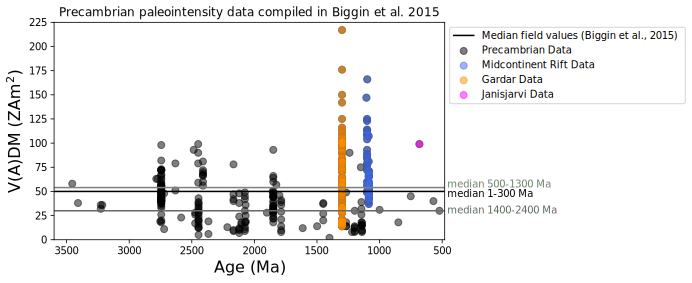

In [20]:
plt.figure(figsize=(7,4))
plt.scatter(Precambrian_PINT['AGE'],Precambrian_PINT['VDM/VADM'], 
             color='black',marker ='o', label = 'Precambrian Data',s = 50,alpha=0.5)
plt.scatter(Precambrian_PINT_MCR['AGE'],Precambrian_PINT_MCR['VDM/VADM'], 
             color='royalblue',marker ='o', label = 'Midcontinent Rift Data',s = 50, alpha=0.5)
plt.scatter(Precambrian_PINT_Gardar['AGE'],Precambrian_PINT_Gardar['VDM/VADM'], 
             color='darkorange',marker ='o', label = 'Gardar Data',s = 50,alpha=0.5)
plt.scatter(Precambrian_PINT_Janisjarvi['AGE'],Precambrian_PINT_Janisjarvi['VDM/VADM'], 
             color='magenta',marker ='o', label = 'Janisjarvi Data',s = 50,alpha=0.5)

plt.xlim(400,4500)
plt.ylim(0,225)

plt.axhline(y=50,color='#000000',label = 'Median field values (Biggin et al., 2015)')
plt.text(460,47,'median 1-300 Ma',color='#000000',verticalalignment='center')
plt.axhline(y=54,color='grey')
plt.text(460,57,'median 500-1300 Ma',color='grey',verticalalignment='center')
plt.axhline(y=30,color='dimgrey')
plt.text(460,30,'median 1400-2400 Ma',color='dimgrey',verticalalignment='center')

plt.ylabel(r'V(A)DM $(ZAm^2)$', fontsize = 16)
plt.xlabel('Age (Ma)', fontsize = 16)
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1))
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1))
plt.xlim(3600,480)
plt.title('Precambrian paleointensity data compiled in Biggin et al. 2015')
plt.show()

Data filtered to only include data with QPI scores of 3 or greater. With subsets of the data broken out into different dataframes.

In [21]:
Precambrian_PINT_QPI3 = Precambrian_PINT.loc[Precambrian_PINT.QPI > 2]

Precambrian_PINT_QPI3_noMCR = Precambrian_PINT_QPI3.loc[Precambrian_PINT_QPI3.Province != 'MCR']
Precambrian_PINT_QPI3_noMCR_noG = Precambrian_PINT_QPI3_noMCR.loc[Precambrian_PINT_QPI3_noMCR.AGE != 1300]
Precambrian_PINT_QPI3_noMCR_noG_noJ = Precambrian_PINT_QPI3_noMCR_noG.loc[Precambrian_PINT_QPI3_noMCR_noG.Province != 'Janisjarvi']

Precambrian_PINT_MCR_QPI3 = Precambrian_PINT_QPI3.loc[Precambrian_PINT_QPI3.Province == 'MCR']
Precambrian_PINT_Gardar_QPI3 = Precambrian_PINT_QPI3.loc[Precambrian_PINT_QPI3.Province == 'GARDAR']
Precambrian_PINT_Janisjarvi_QPI3 = Precambrian_PINT_QPI3.loc[Precambrian_PINT_QPI3.Province == 'Janisjarvi']

Precambrian_PINT_MCR_QPI3_noPH = Precambrian_PINT_MCR_QPI3.loc[Precambrian_PINT_MCR_QPI3.Ref != 54]

What fraction of the data with QPI greater than or equal to 3 are from the Midcontinent Rift and Gardar?

In [22]:
(len(Precambrian_PINT_MCR_QPI3)+len(Precambrian_PINT_Gardar_QPI3))/len(Precambrian_PINT_QPI3)

0.24519230769230768

Plot the QPI greater than or equal to 3 along with another plot that is further filtered to exclude data based on low-temperature slopes (Gardar lavas; Pesonen and Halls, 1983 MCR estimates; Janisjarvi impact) and includes our new estimates.

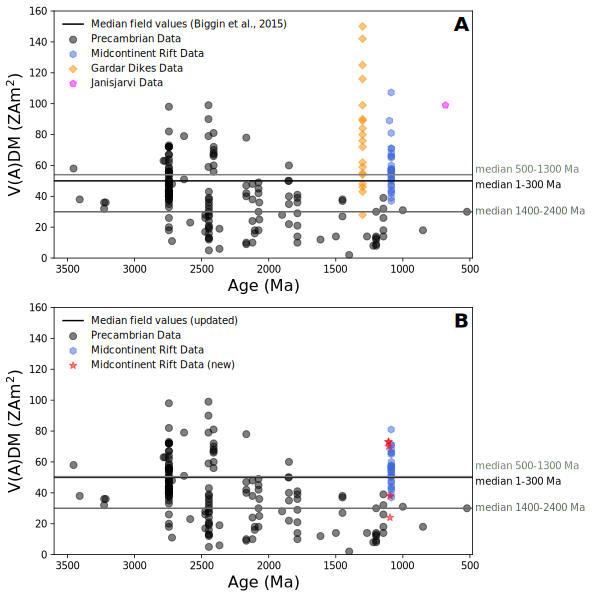

In [23]:
plt.figure(figsize=(7.5,10))

plt.subplot(2,1,1)
plt.scatter(Precambrian_PINT_QPI3_noMCR_noG_noJ['AGE'],Precambrian_PINT_QPI3_noMCR_noG_noJ['VDM/VADM'], 
             color='black',marker ='o', label = 'Precambrian Data',s = 50,alpha=0.5)
plt.scatter(Precambrian_PINT_MCR_QPI3['AGE'],Precambrian_PINT_MCR_QPI3['VDM/VADM'], 
             color='royalblue',marker ='h', label = 'Midcontinent Rift Data',s = 50, alpha=0.5)
plt.scatter(Precambrian_PINT_Gardar_QPI3['AGE'],Precambrian_PINT_Gardar_QPI3['VDM/VADM'], 
             color='darkorange',marker ='D', label = 'Gardar Dikes Data',s = 30,alpha=0.5)
plt.scatter(Precambrian_PINT_Janisjarvi['AGE'],Precambrian_PINT_Janisjarvi['VDM/VADM'], 
             color='magenta',marker ='p', label = 'Janisjarvi Data',s = 50,alpha=0.5)

plt.ylim(0,160)

plt.axhline(y=50,color='#000000',label = 'Median field values (Biggin et al., 2015)')
plt.text(460,47,'median 1-300 Ma',color='#000000',verticalalignment='center')
plt.axhline(y=54,color='grey')
plt.text(460,57,'median 500-1300 Ma',color='grey',verticalalignment='center')
plt.axhline(y=30,color='dimgrey')
plt.text(460,30,'median 1400-2400 Ma',color='dimgrey',verticalalignment='center')

plt.ylabel(r'V(A)DM $(ZAm^2)$', fontsize = 16)
plt.xlabel('Age (Ma)', fontsize = 16)
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(0,1),frameon=False)
plt.xlim(3600,480)
plt.text(620,147,'A',fontweight='bold',fontsize=20)

plt.subplot(2,1,2)
plt.scatter(Precambrian_PINT_QPI3_noMCR_noG_noJ['AGE'],Precambrian_PINT_QPI3_noMCR_noG_noJ['VDM/VADM'], 
             color='black',marker ='o', label = 'Precambrian Data',s = 50,alpha=0.5)
plt.scatter(Precambrian_PINT_MCR_QPI3_noPH['AGE'],Precambrian_PINT_MCR_QPI3_noPH['VDM/VADM'], 
             color='royalblue',marker ='h', label = 'Midcontinent Rift Data',s = 50, alpha=0.5)
plt.scatter(MCR_PINT_new['AGE'],MCR_PINT_new['VDM']*10, 
             color='red',marker ='*', label = 'Midcontinent Rift Data (new)',s = 60,alpha=0.5)

plt.ylim(0,160)

plt.axhline(y=50,color='#000000',label = 'Median field values (updated)')
plt.text(460,47,'median 1-300 Ma',color='#000000',verticalalignment='center')
plt.axhline(y=50.5,color='grey')
plt.text(460,57,'median 500-1300 Ma',color='grey',verticalalignment='center')
plt.axhline(y=30,color='dimgrey')
plt.text(460,30,'median 1400-2400 Ma',color='dimgrey',verticalalignment='center')

plt.ylabel(r'V(A)DM $(ZAm^2)$', fontsize = 16)
plt.xlabel('Age (Ma)', fontsize = 16)
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(0,1),frameon=False)
plt.xlim(3600,480)
plt.text(620,147,'B',fontweight='bold',fontsize=20)
plt.savefig('../figures/Figure_1.pdf')

### Early, mid, late and recent using Biggin et al. (2015) bins

Here we assess statistical parameters of Precambrian data separated into bins defined in Biggin et al. (2015). 

Below we calculate the number of paleointensity values in each bin and their median values.

In [24]:
#Biggin Bins:
#1-300 Myr
#500–1,300 Myr
#1,400–2,400 Myr
#2,400–3,500 Myr
recent_PINT = Recent_PINT.loc[Recent_PINT.AGE > 0.99]
early_PINT = Precambrian_PINT_QPI3.loc[Precambrian_PINT_QPI3.AGE > 2400]

mid_PINT = Precambrian_PINT_QPI3.loc[Precambrian_PINT_QPI3.AGE < 2400]
mid_PINT = mid_PINT.loc[mid_PINT.AGE > 1399]

late_PINT = Precambrian_PINT_QPI3.loc[Precambrian_PINT_QPI3.AGE < 1400]

early_PINT_values =  early_PINT['VDM/VADM'].tolist()
mid_PINT_values =  mid_PINT['VDM/VADM'].tolist()
late_PINT_values =  late_PINT['VDM/VADM'].tolist()
recent_PINT_values = recent_PINT['VDM/VADM'].tolist()

print ('number of recent PINT values')
print (len(recent_PINT_values))
print ('median of recent PINT values')
print (np.median(recent_PINT_values))
print('')
print ('number of early PINT values')
print (len(early_PINT_values))
print ('median of early PINT values')
print (np.median(early_PINT_values))
print('')
print ('number of mid PINT values')
print (len(mid_PINT_values))
print ('median of mid PINT values')
print (np.median(mid_PINT_values))
print('')
print ('number of late PINT values')
print (len(late_PINT_values))
print ('median of late PINT values')
print (np.median(late_PINT_values))
print('')

number of recent PINT values
218
median of recent PINT values
50.0

number of early PINT values
99
median of early PINT values
44.0

number of mid PINT values
41
median of mid PINT values
30.0

number of late PINT values
68
median of late PINT values
54.0



What fraction of data in the 'Late' Bin of QPI greater than or equal to 3 data are from the Midcontinent Rift or Gardar?

In [25]:
print(len(Precambrian_PINT_MCR_QPI3))
print(len(Precambrian_PINT_Gardar_QPI3))
print(len(late_PINT))
print((len(Precambrian_PINT_MCR_QPI3)+len(Precambrian_PINT_Gardar_QPI3))/len(late_PINT))

32
19
68
0.75


How does the median of 'Late' bin change with exclusions and new data?

In [26]:
print ('number of late PINT values (Biggin et al. 2015)')
print (len(late_PINT_values))
print ('median of late PINT values (Biggin et al. 2015)')
print (np.median(late_PINT_values))

late_PINT_filtered = late_PINT.loc[late_PINT.Province != 'GARDAR']

print ("")
print ('number of late PINT values with Gardar filtered out')
print (len(late_PINT_filtered))
late_PINT_filtered = late_PINT_filtered.loc[late_PINT_filtered.Ref != 54]
print ('number of late PINT values with Halls and Pesonen filtered out')
print (len(late_PINT_filtered))
late_PINT_filtered = late_PINT_filtered.loc[late_PINT_filtered.Province != 'Janisjarvi']
print ('number of late PINT values with Janisjarvi filtered out')
print (len(late_PINT_filtered))
late_PINT_filtered_values =  late_PINT_filtered['VDM/VADM'].tolist()
print ('median of filtered late PINT values')
print (np.median(late_PINT_filtered_values))

MCR_PINT_new_VDMs = MCR_PINT_new['VDM']*10
MCR_PINT_new_VDMs_list = MCR_PINT_new_VDMs.tolist()
late_PINT_filtered_new =  late_PINT_filtered_values + MCR_PINT_new_VDMs_list
print ("")
print ('number of late PINT values with high slopes filtered out and new data added')
print (len(late_PINT_filtered_new))
print ('median of filtered late PINT values')
print (np.median(late_PINT_filtered_new))

print ("")
late_PINT_filtered_noMCR = late_PINT_filtered.loc[late_PINT_filtered.Ref != 687]
print ('number of late PINT values with all rift filtered out')
print (len(late_PINT_filtered_noMCR))
late_PINT_filtered_noMCR_values =  late_PINT_filtered_noMCR['VDM/VADM'].tolist()
print ('median of filtered late PINT values with all rift filtered out')
print (np.median(late_PINT_filtered_noMCR_values))

number of late PINT values (Biggin et al. 2015)
68
median of late PINT values (Biggin et al. 2015)
54.0

number of late PINT values with Gardar filtered out
49
number of late PINT values with Halls and Pesonen filtered out
47
number of late PINT values with Janisjarvi filtered out
46
median of filtered late PINT values
48.5

number of late PINT values with high slopes filtered out and new data added
51
median of filtered late PINT values
50.0

number of late PINT values with all rift filtered out
16
median of filtered late PINT values with all rift filtered out
16.0


Next we use the Kolmogorov-Smirnov test to test whether the distributions of VDMs between time bins are distinct.

In [27]:
print ('Mid PINT values and Late PINT values:')
print (stats.ks_2samp(mid_PINT_values, late_PINT_values))
print ('_________')
print ('\nMid PINT values and Late PINT filtered values:')
print (stats.ks_2samp(mid_PINT_values, late_PINT_filtered_values))
print ('_________')
print ('\nMid PINT values and Late PINT filtered values (new):')
print (stats.ks_2samp(mid_PINT_values, late_PINT_filtered_new))
print ('_________')
print ('\nEarly PINT values and Late PINT values:')
print (stats.ks_2samp(early_PINT_values, late_PINT_values))
print ('_________')
print ('\nEarly PINT values and Late PINT filtered values:')
print (stats.ks_2samp(early_PINT_values, late_PINT_filtered_values))
print ('_________')
print ('\nEarly PINT values and Late PINT filtered values (new):')
print (stats.ks_2samp(early_PINT_values, late_PINT_filtered_new))
print ('_________')
print ('\nEarly PINT values and Late PINT filtered values (no Midcontinent Rift data):')
print (stats.ks_2samp(early_PINT_values, late_PINT_filtered_noMCR_values))

Mid PINT values and Late PINT values:
Ks_2sampResult(statistic=0.53945480631276899, pvalue=2.9390169098533278e-07)
_________

Mid PINT values and Late PINT filtered values:
Ks_2sampResult(statistic=0.42948038176033931, pvalue=0.00040766178749941342)
_________

Mid PINT values and Late PINT filtered values (new):
Ks_2sampResult(statistic=0.44141559062649449, pvalue=0.00016599641176772697)
_________

Early PINT values and Late PINT values:
Ks_2sampResult(statistic=0.19429590017825316, pvalue=0.083443140174800437)
_________

Early PINT values and Late PINT filtered values:
Ks_2sampResult(statistic=0.13658322353974528, pvalue=0.56954040179214771)
_________

Early PINT values and Late PINT filtered values (new):
Ks_2sampResult(statistic=0.1152703505644682, pvalue=0.73639260890525471)
_________

Early PINT values and Late PINT filtered values (no Midcontinent Rift data):
Ks_2sampResult(statistic=0.71527777777777779, pvalue=4.7479495498297676e-07)


Below we plot the culumulative distributions of binned paleointensity estimates.

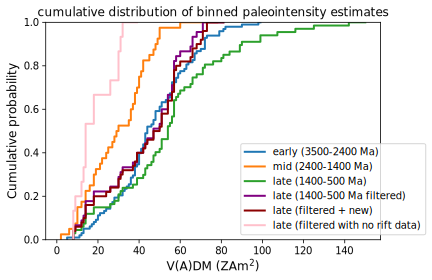

In [28]:
early_PINT_sorted = early_PINT['VDM/VADM'].sort_values()
cum_dist = np.linspace(0.,1.,len(early_PINT_sorted))
ser_cdf = pd.Series(cum_dist, index=early_PINT_sorted)
ser_cdf.plot(drawstyle='steps',label='early (3500-2400 Ma)',linewidth=2)

mid_PINT_sorted = mid_PINT['VDM/VADM'].sort_values()
cum_dist = np.linspace(0.,1.,len(mid_PINT_sorted))
ser_cdf = pd.Series(cum_dist, index=mid_PINT_sorted)
ser_cdf.plot(drawstyle='steps',label='mid (2400-1400 Ma)',linewidth=2)

late_PINT_sorted = late_PINT['VDM/VADM'].sort_values()
cum_dist = np.linspace(0.,1.,len(late_PINT_sorted))
ser_cdf = pd.Series(cum_dist, index=late_PINT_sorted)
ser_cdf.plot(drawstyle='steps',label='late (1400-500 Ma)',linewidth=2)

late_PINT_sorted = late_PINT_filtered['VDM/VADM'].sort_values()
cum_dist = np.linspace(0.,1.,len(late_PINT_sorted))
ser_cdf = pd.Series(cum_dist, index=late_PINT_sorted)
ser_cdf.plot(drawstyle='steps',label='late (1400-500 Ma filtered)',color='purple',linewidth=2)

late_PINT_sorted = pd.Series(late_PINT_filtered_new).sort_values()
cum_dist = np.linspace(0.,1.,len(late_PINT_sorted))
ser_cdf = pd.Series(cum_dist, index=late_PINT_sorted)
ser_cdf.plot(drawstyle='steps',label='late (filtered + new)',color='darkred',linewidth=2)

late_PINT_sorted = pd.Series(late_PINT_filtered_noMCR_values).sort_values()
cum_dist = np.linspace(0.,1.,len(late_PINT_sorted))
ser_cdf = pd.Series(cum_dist, index=late_PINT_sorted)
ser_cdf.plot(drawstyle='steps',label='late (filtered with no rift data)',color='pink',linewidth=2)

plt.ylim(0,1)
plt.title('cumulative distribution of binned paleointensity estimates')
plt.xlabel(r'V(A)DM $(ZAm^2)$', fontsize = 12)
plt.ylabel('Cumulative probability',fontsize = 12)
plt.legend(loc='lower right',bbox_to_anchor=(1.15, 0.))
plt.show()

Here we generate the same cumulative distribution plot but exclude late filtered data and late filtered with no Midcontinent Rift data.

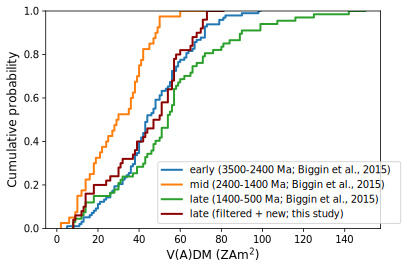

In [29]:
early_PINT_sorted = early_PINT['VDM/VADM'].sort_values()
cum_dist = np.linspace(0.,1.,len(early_PINT_sorted))
ser_cdf = pd.Series(cum_dist, index=early_PINT_sorted)
ser_cdf.plot(drawstyle='steps',label='early (3500-2400 Ma; Biggin et al., 2015)',linewidth=2)

mid_PINT_sorted = mid_PINT['VDM/VADM'].sort_values()
cum_dist = np.linspace(0.,1.,len(mid_PINT_sorted))
ser_cdf = pd.Series(cum_dist, index=mid_PINT_sorted)
ser_cdf.plot(drawstyle='steps',label='mid (2400-1400 Ma; Biggin et al., 2015)',linewidth=2)

late_PINT_sorted = late_PINT['VDM/VADM'].sort_values()
cum_dist = np.linspace(0.,1.,len(late_PINT_sorted))
ser_cdf = pd.Series(cum_dist, index=late_PINT_sorted)
ser_cdf.plot(drawstyle='steps',label='late (1400-500 Ma; Biggin et al., 2015)',linewidth=2)

late_PINT_sorted = pd.Series(late_PINT_filtered_new).sort_values()
cum_dist = np.linspace(0.,1.,len(late_PINT_sorted))
ser_cdf = pd.Series(cum_dist, index=late_PINT_sorted)
ser_cdf.plot(drawstyle='steps',label='late (filtered + new; this study)',
             color='darkred',linewidth=2)

plt.ylim(0,1)
#plt.title('cumulative distribution of binned paleointensity estimates')
plt.legend(loc='lower right',bbox_to_anchor=(1.075, 0.))
plt.xlabel(r'V(A)DM $(ZAm^2)$', fontsize = 12)
plt.ylabel('Cumulative probability',fontsize = 12)
plt.savefig('../figures/Figure_7.pdf')
plt.show()

### New bins
The inclusion of our data in combination with new filtering removes evidence for an increase in field intensity before the start of Midcontinent Rift volcanism at ~1.1 Ga. As such, we reassign time bins to ‘Early (3500-2400 Ma)’, ‘Mid (2400-1100 Ma)’, and ‘Late (1100-500 Ma)’ which may better characterize the data.

In [30]:
#New Bins:
#500–1,110 Myr
#1,110–2,400 Myr
#2,400–3,500 Myr
new_early_PINT = Precambrian_PINT_QPI3.loc[Precambrian_PINT_QPI3.AGE > 2400]

mid_PINT = Precambrian_PINT_QPI3.loc[Precambrian_PINT_QPI3.AGE < 2400]
new_mid_PINT = mid_PINT.loc[mid_PINT.AGE > 1110]
new_mid_PINT_filtered = new_mid_PINT.loc[new_mid_PINT.Province != 'GARDAR']

new_late_PINT = Precambrian_PINT_QPI3.loc[Precambrian_PINT_QPI3.AGE < 1110]
new_late_PINT_filtered = new_late_PINT.loc[new_late_PINT.Ref != 54]
new_late_PINT_filtered = new_late_PINT_filtered.loc[new_late_PINT_filtered.Province != 'Janisjarvi']

new_early_PINT_values =  new_early_PINT['VDM/VADM'].tolist()
new_mid_PINT_values =  new_mid_PINT_filtered['VDM/VADM'].tolist()
new_late_PINT_values =  new_late_PINT_filtered['VDM/VADM'].tolist() + MCR_PINT_new_VDMs_list

print ('number of early PINT values (new bins)')
print (len(new_early_PINT_values))
print ('Median of early PINT values (new bins)')
print (np.median(new_early_PINT_values))
print('')
print ('number of mid PINT values (new bins)')
print (len(new_mid_PINT_values))
print ('Median of mid PINT values (new bins)')
print (np.median(new_mid_PINT_values))
print('')
print ('number of late PINT values (new bins)')
print (len(new_late_PINT_values))
print ('Median of late PINT values (new bins)')
print (np.median(new_late_PINT_values))

number of early PINT values (new bins)
99
Median of early PINT values (new bins)
44.0

number of mid PINT values (new bins)
54
Median of mid PINT values (new bins)
26.5

number of late PINT values (new bins)
38
Median of late PINT values (new bins)
55.0


Box and whisker plots for the data compilation. The first subplot is the Biggin et al. (2015) filtered to be data with QPI scores greater than or equal to 3. The second subplot shows the reliance of the compilation on data from the Midcontinent Rift and Gardar lavas. The next plot is filters the database by removing data from Gardar lavas, the Halls and Pesonen Midcontinent Rift results, and the data point from the Janisjarvi impact while adding our new data.

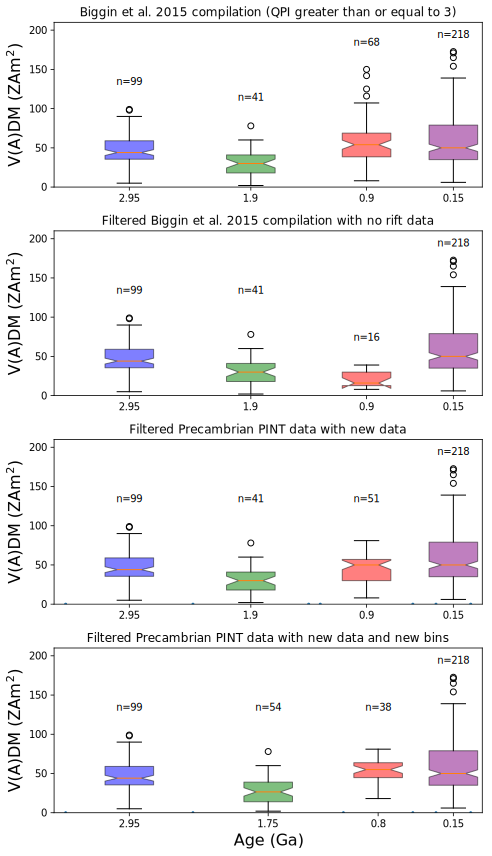

In [31]:
plt.figure(figsize=(7,12))
plt.subplot(4,1,1)
box = plt.boxplot([early_PINT_values,mid_PINT_values,late_PINT_values,recent_PINT_values],
            positions=[2.95,1.9,0.9,0.15], notch=True, patch_artist=True)
plt.title('Biggin et al. 2015 compilation (QPI greater than or equal to 3)')
plt.xlim(3.6,-0.1)
plt.ylim(0,210)

colors = ['blue', 'green', 'red','purple']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
    
plt.text(2.95,130,'n=99',horizontalalignment='center')
plt.text(1.9,110,'n=41',horizontalalignment='center')
plt.text(0.9,180,'n=68',horizontalalignment='center')
plt.text(0.15,190,'n=218',horizontalalignment='center')
plt.ylabel(r'V(A)DM $(ZAm^2)$', fontsize = 16)

plt.subplot(4,1,2)
box2 = plt.boxplot([early_PINT_values,mid_PINT_values,late_PINT_filtered_noMCR_values,recent_PINT_values],
            positions=[2.95,1.9,0.9,0.15], notch=True, patch_artist=True)
plt.title('Filtered Biggin et al. 2015 compilation with no rift data')
plt.xlim(3.6,-0.1)
plt.ylim(0,210)

colors = ['blue', 'green', 'red', 'purple']
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
    
plt.text(2.95,130,'n=99',horizontalalignment='center')
plt.text(1.9,130,'n=41',horizontalalignment='center')
plt.text(0.9,70,'n=16',horizontalalignment='center')
plt.text(0.15,190,'n=218',horizontalalignment='center')

plt.ylabel(r'V(A)DM $(ZAm^2)$', fontsize = 16)

plt.subplot(4,1,3)

box = plt.boxplot([early_PINT_values,mid_PINT_values,late_PINT_filtered_new,recent_PINT_values],
            positions=[2.95,1.9,0.9,0.15], notch=True, patch_artist=True)
plt.title('Filtered Precambrian PINT data with new data')
plt.xlim(3.600,-0.1)
plt.ylim(0,210)

colors = ['blue', 'green', 'red','purple']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)

plt.plot([0,0.3,0.5,1.3,1.4,2.4,3.5],[0,0,0,0,0,0,0],'.',markersize=4)
plt.text(2.95,130,'n=99',horizontalalignment='center')
plt.text(1.9,130,'n=41',horizontalalignment='center')
plt.text(0.9,130,'n=51',horizontalalignment='center')
plt.text(0.15,190,'n=218',horizontalalignment='center')
plt.ylabel(r'V(A)DM $(ZAm^2)$', fontsize = 16)


plt.subplot(4,1,4)

box2 = plt.boxplot([new_early_PINT_values,new_mid_PINT_values,new_late_PINT_values,recent_PINT_values],
            positions=[2.95,1.75,0.8,0.15], notch=True, patch_artist=True)
plt.title('Filtered Precambrian PINT data with new data and new bins')
plt.xlim(3.600,-.1)
plt.ylim(0,210)

colors = ['blue', 'green', 'red','purple']
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
    
plt.plot([0,0.3,0.5,1.1,2.4,3.5],[0,0,0,0,0,0],'.',markersize=4)
plt.text(2.95,130,'n=99',horizontalalignment='center')
plt.text(1.75,130,'n=54',horizontalalignment='center')
plt.text(0.8,130,'n=38',horizontalalignment='center')
plt.text(0.15,190,'n=218',horizontalalignment='center')
plt.ylabel(r'V(A)DM $(ZAm^2)$', fontsize = 16)
plt.xlabel(r'Age (Ga)', fontsize = 16)

plt.tight_layout()
plt.savefig('../figures/Figure_6.pdf')
plt.show()

Next we use the Kolmogorov-Smirnov test to test whether the distributions of VDMs between the new time bins are distinct.

In [32]:
print ('NEW Mid PINT values and NEW Late PINT values:')
print (stats.ks_2samp(new_mid_PINT_values, new_late_PINT_values))
print ('_________')
print ('\nNEW Early PINT values and NEW Late PINT values:')
print (stats.ks_2samp(new_early_PINT_values, new_late_PINT_values))
print ('_________')
print ('\nNEW Early PINT values and NEW Mid PINT values:')
print (stats.ks_2samp(new_mid_PINT_values, new_early_PINT_values))

NEW Mid PINT values and NEW Late PINT values:
Ks_2sampResult(statistic=0.64132553606237819, pvalue=6.949602296503223e-09)
_________

NEW Early PINT values and NEW Late PINT values:
Ks_2sampResult(statistic=0.27006911217437535, pvalue=0.029275500692943095)
_________

NEW Early PINT values and NEW Mid PINT values:
Ks_2sampResult(statistic=0.4175084175084175, pvalue=5.7503193451409564e-06)


We now generate a cumulative distribution plot for new time bins.

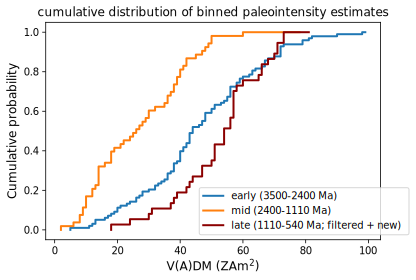

In [33]:
new_early_PINT_sorted = new_early_PINT['VDM/VADM'].sort_values()
cum_dist = np.linspace(0.,1.,len(new_early_PINT_sorted))
ser_cdf = pd.Series(cum_dist, index=new_early_PINT_sorted)
ser_cdf.plot(drawstyle='steps',label='early (3500-2400 Ma)',linewidth=2)

new_mid_PINT_sorted = new_mid_PINT_filtered['VDM/VADM'].sort_values()
cum_dist = np.linspace(0.,1.,len(new_mid_PINT_sorted))
ser_cdf = pd.Series(cum_dist, index=new_mid_PINT_sorted)
ser_cdf.plot(drawstyle='steps',label='mid (2400-1110 Ma)',linewidth=2)

# late_PINT_sorted = late_PINT['VDM/VADM'].order()
# cum_dist = np.linspace(0.,1.,len(late_PINT_sorted))
# ser_cdf = pd.Series(cum_dist, index=late_PINT_sorted)
# ser_cdf.plot(drawstyle='steps',label='late (1110-500 Ma)',linewidth=2)

new_late_PINT_sorted = pd.Series(new_late_PINT_values).sort_values()
cum_dist = np.linspace(0.,1.,len(new_late_PINT_sorted))
ser_cdf = pd.Series(cum_dist, index=new_late_PINT_sorted)
ser_cdf.plot(drawstyle='steps',label='late (1110-540 Ma; filtered + new)',color='darkred',linewidth=2)


plt.title('cumulative distribution of binned paleointensity estimates')
plt.legend(loc='lower right',bbox_to_anchor=(1.1, 0.))
plt.xlabel(r'V(A)DM $(ZAm^2)$', fontsize = 12)
plt.ylabel('Cumulative probability', fontsize = 12)
plt.show()